# Sesion III. Monte Carlo de Integrales de Trayectoria


## 3.1 Mecánica Estadística Cuántica- Matrices de Densidad

En el ensamble canónico con la distribución de Boltzmann la probabilidad de estar en un autoestado de energía es $E_i$ de un sistema cuántico es:

$$p_i=\frac{\exp(-\beta E_i)}{Z}\;\:\: \beta=\frac{1}{k_{\beta T}}$$

Con 

$$Z=\sum_{i} \exp(-\beta E_i)$$ 

Luego el promedio termico de un operador es $\hat{O}$ es dado por:

$$\langle \hat{O}\rangle =\frac{1}{Z}\sum_{i}\langle \phi_i | \hat{O} |\phi_i\rangle \exp(-\beta E_i)$$


Lo cual puede ser escrito como: 

$$\langle \hat{O}\rangle = \frac{1}{Z} Tr \left( \hat{O}\exp\left(-\beta\hat{H}\right)\right)$$


Donde el operador matriz densidad es: 

$$ \exp\left(-\beta\hat{H}\right) $$

Colocando este operador en representacion de una base de posición:

$$\begin{align}
\rho(R,R';\beta) &= \langle R | \exp\left(-\beta\hat{H}\right) R' \rangle\\
&=\sum_{i} \phi_i^{*}(R)\phi_i^(R') \exp\left(-\beta E_{i}\right)
\end{align}
$$

Esta es conocida como la __matriz densidad__, esta matriz es definida positiva y puede ser interpretada como una distribución de probabilidad. Los observables en la base de posición son descritos como:

$$
\langle \hat{O}\rangle =\frac{1}{Z}\int dR dR'  \rho(R,R';\beta) \langle R' | \hat{O} |R\rangle 
$$

La función de partición puede ser escrita en la base de posición como:

$$
Z = \int dR \rho(R,R;\beta)
$$

Es extremadamente complicado calcular la función de partición de sistemas de partículas clásicos y cuánticos. En el caso cuántico gran parte de la dificultad esta en el cálculo de los autovalores y autovectores  del sistema. Sin embargo usando la representación del sistema en la base de posición nos conduce a una serie de ecuaciones que nos permite usar Monte Carlo para solucionar las integrales.  


Adicionalmente la propiedad de completez:

$$
I= dR" \int |R"\rangle\langle R" |
$$

Para un operador densidad definido como:

$$\exp(-(\beta_1 +\beta_2)\hat{H})$$

La matriz densidad cumple de forma exacta la siguiente propiedad: 

$$
\begin{align}
\rho(R,R';\beta_1 +\beta_2) &= \int dR" \langle R | \exp\left(-\beta_1\hat{H}\right) R" \rangle \langle R" | \exp\left(-\beta_2\hat{H}\right) R' \rangle\\
& \int dR" \rho(R,R";\beta_1) \rho(R",R';\beta_2)
\end{align}
$$

Esta propiedad es conocida como convolución es una condición importante del método de Monte Carlo de Integrales de Trayectoria. Si usamos un producto de operadores de matriz densidad tal que:

$$\exp\left(-\beta \hat{H}\right)= \left(\exp\left(-\tau \hat{H}\right)\right)^M$$

Donde 

$$\tau=\frac{\beta}{M}$$

Luego la matriz densidad puede ser escrita como un producto de M matrices densidad a temperatura $\tau$:

$$
\rho(R_0,R_M;\beta)= \int dR_1 dR_2\cdots dR_{M-1} \rho(R_0,R_1;\tau) \rho(R_1,R_2;\tau) \cdots \rho(R_{M-1},R_{M};\tau)
$$

Esta representación de la matriz densidad es conocida como la Integrales de Feynnman. La integración es realizda sobre las configuraciones intermedias $R_1,R_2\cdots R_{M-1}$, dejando los extremos fijos $R_{0},R_{M}$. 

La acción de la integral es definida como:

$$
S_{path}(R_{0},R_{1},\cdots R_{M}) =-\ln [\rho(R_0,R_1;\tau) \rho(R_1,R_2;\tau) \cdots \rho(R_{M-1},R_{M};\tau)]
$$

Luego:

$$
\rho(R_0,R_M;\beta)=\int dR_1 dR_2\cdots dR_{M-1} \exp\left(-S_{path}(R_{0},R_{1},\cdots R_{M}) \right)
$$

Si M es finito tenemos un camino discreto sobre el cual se calculo la integral en el límite  $M\to\infty$ el camino es conituno. Es importante notar que esta expresión es __exacta__ no se ha introducido ninguna aproximación.


## Acción Primitiva

La evaluación de la matriz densidad requiere una aproximación del operador densidad, ya que no podemos aplicar este de manera directa, porque implicaria la solución de la ecuación de Schrödinger. Asi una aproximación para la apliación del operador densidad consiste en hacer una expansión de Trotter en terminos separados del operador $\hat{T}$,$\hat{V}$:

$$
\exp(-\tau\hat{H})=\exp(-\tau\hat{T})\exp(-\tau\hat{V})\exp\left(-\frac{\tau^2}{2}[\hat{T},\hat{V}]\right)+O(\tau^3)
$$

Para $\tau<<1$, tenemos: 

$$
\exp(-\tau\hat{H})\sim \exp(-\tau\hat{T})\exp(-\tau\hat{V})
$$

Para un sistema de N partículas en 3 dimensiones tenemos que: 

$$
\rho(R_{0},R_{M},\tau)=\int dR_1 dR_2\cdots dR_{M-1} (4\pi\lambda\tau)^{-\frac{3N}{2}} \exp\left(-\sum_{m=1}^{N}\left[ \frac{(R_{m-1}-R_{m})^2}{4\lambda\tau}+\frac{\tau}{2}(V(R_{m-1}+V(R_{m}))\right]\right)
$$

Con 

$$
\lambda=\frac{\hbar^2}{2m}
$$
De esto podemos inferir la definición de la acción cinética o de partícula libre y la acción potencial:


$$
K_{path}(R_{0},R_{M},\tau)= \frac{3N}{2}\ln(4\pi\lambda\tau)+\sum_{m=1}^{N}\left[ \frac{(R_{m-1}-R_{m})^2}{4\lambda\tau}\right]
$$

$$
V_{path}(R_{0},R_{M},\tau) = \frac{\tau}{2} \sum_{m=1}^{N}(V(R_{m-1}+V(R_{m}))
$$

Recordando que los observables son tomados como:

$$
\langle R | \hat{O} R \rangle = \frac{1}{Z}\int dR dR'  \exp\left(-S_{path}(R, R_{'}) \right) \langle R' | \hat{O} |R\rangle 
$$

Luego se puede inferir que los caminos que definen los observable son cerrados $R_{M}=R_{0}$.


Definidas estas cantidades ya podemos delinear como se puede construir un algotimo Metropolis, para muestrear la integral basado en la probabilidad: 




In [1]:
#Cargue desde el inicio las bibliotecas necesarias para no llamarlas de nuevo a lo largo del cuaderno jupyter. 
import numpy as np
#%matplotlib inline
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


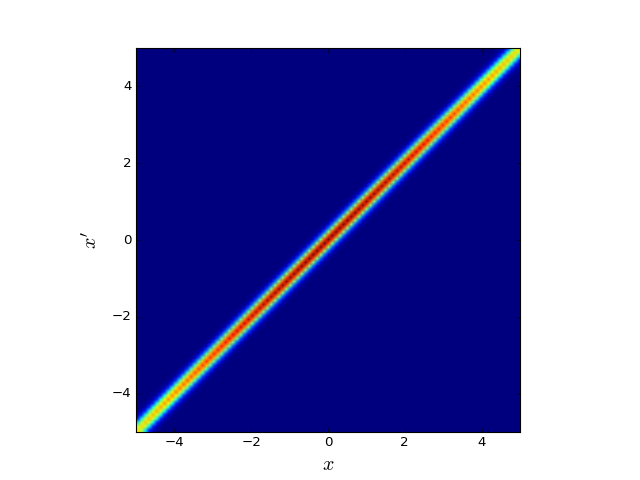

In [2]:
def rho_free(x, xp, beta):
    return (np.exp(-(x - xp) ** 2 / (2.0 * beta)) /
            np.sqrt(2.0 * np.pi * beta))

def rho_harmonic_trotter(grid, beta):
    return np.array([[rho_free(x, xp, beta) * \
                         np.exp(-0.5 * beta * 0.5 * (x ** 2 + xp ** 2)) \
                         for x in grid] for xp in grid])

x_max = 5.0
nx = 100
dx = 2.0 * x_max / (nx - 1)
x = [i * dx for i in range(-(nx - 1) / 2, nx / 2 + 1)]
x=np.asarray(x);
beta_tmp = 2.0 ** (-5)
beta     = 2.0 ** (3)
rho = rho_harmonic_trotter(x, beta_tmp)

plt.figure()
plt.imshow(rho, extent=[-x_max, x_max, -x_max, x_max], origin='lower')
#plt.colorbar()
plt.title('$\beta = 2^{%i}$' % beta)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$x\'$', fontsize=18)
#plt.savefig('plot-harmonic-rho.png')




## Cuadrados de Matrices 

Hay una propiedad fundamental que nos permite ir de altas temperaturas a bajas temperaturas, usando la propuedad de convolucion de la matriz densidad esto es:

$$
\rho(R,R';(\beta_{1}+\beta_{2})) = \int dR" \rho(R,R";\beta_{1})\rho(R",R';\beta_{2}) 
$$

Si $\beta_1 =\beta_2 =\beta$, entonces $\beta_{1}+\beta_{2}=\beta$

Luego es fácil de observar que, de manera aproximada o para $\beta$ pequeño se puede reemplzar la integral por una sumatoria enconces tenemos que:

$$
\sum_{l} \rho_{kl} \rho_{lm} = (\rho^2)_{km} 
$$

Luego si se multiplica sucesivamente una matriz se esta bajando una temperatura a la mitad cada vez ue se hace esta operación. De esta manera podemos optener la matriz densidad a bajas temperaturas desde temperatuaras más altas. 




<IPython.core.display.Javascript object>


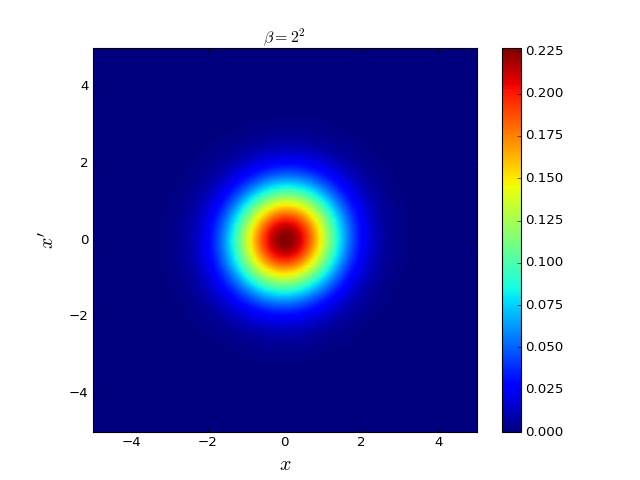

In [3]:
#Matrix squaring

import math 

beta_tmp = 2.0 ** (-8)                   # initial value of beta (power of 2)
beta     = 2.0 ** 2                      # actual value of beta (power of 2)
rho = rho_harmonic_trotter(x, beta_tmp)  # density matrix at initial beta
while beta_tmp < beta:
    rho = np.dot(rho, rho)
    rho *= dx
    beta_tmp *= 2.0

# graphics output
plt.figure()
plt.imshow(rho, extent=[-x_max, x_max, -x_max, x_max], origin='lower')
plt.colorbar()
plt.title('$\\beta = 2^{%i}$' % math.log(beta, 2))
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$x\'$', fontsize=18)
#plt.savefig('plot-harmonic-rho.png')





Podemos establecer el algorithmo Metropolis, primero debemos notar que como mencionado anteriormente para hacer cálculo de los observables estamos muestreando sobre integrales en caminos cerrados, esto es un path de la siguiente forma.



<IPython.core.display.Javascript object>


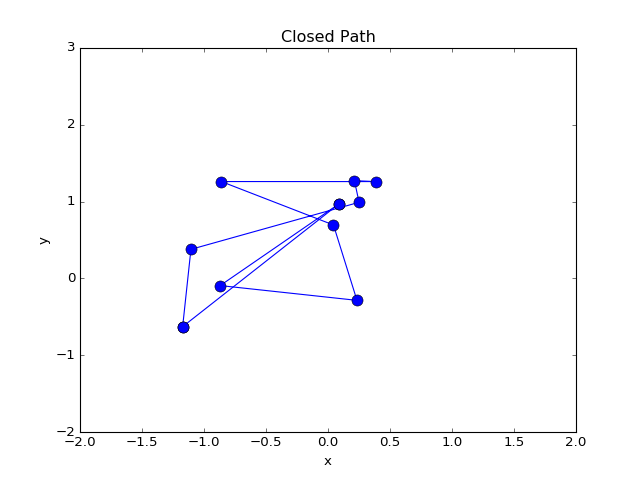

In [4]:
delta=3.0;
nb= 10; #number of beads
x=delta*np.random.uniform(-0.5,0.5,nb);
y=delta*np.random.uniform(-0.5,0.5,nb);

plt.figure()
plt.plot(x,y, 'bo-', markersize=10)
plt.plot([x[0],x[-1]],[y[0],y[-1]], 'bo-', markersize=10)
plt.xlim(-2,2)
plt.ylim(-2,3)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Closed Path")




Esto es un homomorfismo, en el que se mapea una partícula cuántica a un sistema clásico este path puede ser entendido como un anillo polimerico cuyos links o beads, estan unidos por interacciones armonicas o un resorte de constante elástica:

$$\frac{1}{(4\lambda\tau)}$$

La interaccion entre dos párticulas es dada por el potencial, sin embargo cuando una párticula interactua con otra, es decir dos polimeros interactuando los beads de cada polimero interactuan solamente uno a uno con el bead del mismo indice esto es una conseguencia de la propiedad de convolución de la matrix densidad. 



<IPython.core.display.Javascript object>


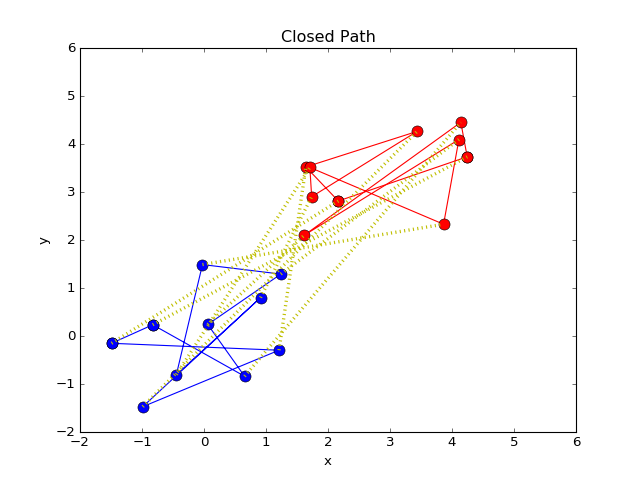

In [5]:
delta=3.0;
nb= 10; #number of beads
x=delta*np.random.uniform(-0.5,0.5,nb);
y=delta*np.random.uniform(-0.5,0.5,nb);


x2=3.0+delta*np.random.uniform(-0.5,0.5,nb);
y2=3.0+delta*np.random.uniform(-0.5,0.5,nb);

plt.figure()
plt.plot(x,y, 'bo-', markersize=10)
plt.plot([x[0],x[-1]],[y[0],y[-1]], 'bo-', markersize=10)


plt.plot(x2,y2, 'ro-', markersize=10)
plt.plot([x2[0],x2[-1]],[y2[0],y2[-1]], 'ro-', markersize=10)


for i in range(0,nb):
    plt.plot([x[i],x2[i]],[y[i],y2[i]], 'y:', linewidth=3)

plt.xlim(-2,6)
plt.ylim(-2,6)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Closed Path")


## Algoritmo Metropolis 

Una vez que tenemos una representación adecuada para muestrear la matrix densidad en este caso en el espacio real y además sabemos como estan definidos los observables en esta representación. El caso más basico en el que se muestrea una partícula a la vez y más especificamente un bead a la vez el esquema del algoritmo, usando la accipon primitiva:


1. Escoja una partícula aleatoriamente. 

2. Escoga un bead aleatoeriamente para proponer un dezplazamiento. 

3. Proponga el nuevo desplazamiento del bead como:

$$x' =x+\eta \sqrt{\lambda\tau}$$

4. Calcule el cambio de la acción $\Delta=S_{new}-S_{old}$

5. Acepte o rechace el movimeinto segun el criterio de aceptación de Metropolis:

$$A(R_{old},R_{new})=\min\left(1,\exp\left(-\beta(S_{new}-S_{old})\right)\right)$$

6. Actualice la posición del bead si fue aceptado. 

Repita estos pasos, un numero dado de iteraciones has que el calculo converga.


xold [ 0.31699229  0.97325868 -0.6400509  -0.05926937  0.84709539  0.90870109
  0.39831787 -0.27166972]
xnew [ 0.04511405  0.21632346  0.25242115  0.76968498 -0.83637536 -0.15990713
 -0.79129098 -0.27166972]
accepted steps 6690


<IPython.core.display.Javascript object>


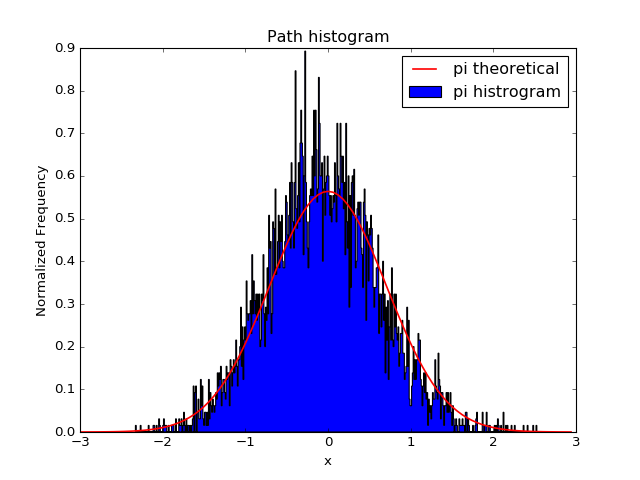

In [36]:
#harmonic Oscillator

beta = 8.0
N = 8
dtau = beta / N
delta = 1.0
n_steps = 10000;
x = np.random.uniform(-1.0,1.0,N);
xold=x;
xdata=[];
print 'xold', xold

dx = np.random.uniform(-delta, delta,n_steps);
dx.shape

eta= np.random.uniform(0.0, 1.0,n_steps);

accept=0;
for step in range(n_steps):
    k = np.random.randint(0, N - 1)
    knext, kprev = (k + 1) % N, (k - 1) % N
    #print step
    x_new = x[k] +dx[step]; 
    old_weight  = (rho_free(x[knext], x[k], dtau) *
                   rho_free(x[k], x[kprev], dtau) *
                   np.exp(-0.5 * dtau * x[k] ** 2))
    new_weight  = (rho_free(x[knext], x_new, dtau) *
                   rho_free(x_new, x[kprev], dtau) *
                   np.exp(-0.5 * dtau * x_new ** 2))
    if eta[step] < (1.0*new_weight/old_weight):
        accept+=1; 
        x[k] = x_new;
        xdata.append(x[k]);
        
print "xnew", x
print 'accepted steps', accept

y=np.arange(0,N);


xgrid = [i * 3.0/50 for i in range(-50, 50)]
piT = [(math.sqrt(math.tanh(0.5*beta))/math.sqrt(math.pi))*math.exp(- (xi*xi)*math.tanh(beta/2)) for xi in xgrid]

plt.figure()
n, bins, patches = plt.hist(xdata, 500, normed=1, histtype='stepfilled', label='pi histrogram')
plt.plot(xgrid, piT, 'r-', lw=1.5, label='pi theoretical')
#plt.setp(patches, 'facecolor', 'g', 'alpha', 0.75)
plt.title('Path histogram')
plt.xlabel('x')
plt.ylabel('Normalized Frequency')
plt.legend()
#plt.savefig('ho_histogram.png')
#plt.show() 





## Levy Flight

Existe una manera más eficiente de hacer los movimientos sobre el path que define la partícula, en facil de observar que mover un bead lejos de sus vecinos puede resultar en una rechazo del movimiento. Se puede usar una aproximación más general si tenemos un bead $x_j$, y fijamos los beads $x_k$ y $x_{k+m}$, tal que $k<j<k+m$. Que estan a una distancia en tiempo imaginario: $\tau(j-k)$ y $\tau(k+m-j)$ de j respectivamente. 

Uno puede descartar los terminos independientes de $j$ para la parte cinetica o de particula libre como:


$$
\rho_{free}(r_k,r_j,\tau(j-k)) \rho_{free}(r_j,r_{k+m},\tau(k+m-j))=\exp\left( \frac{|r_j-r_k|^2}{4\lambda\tau(j-k)}\right)\exp\left( \frac{|r_{k+m}-r_j|^2}{4\lambda\tau(k+m-j)}\right) 
$$


Si ignoramos por un momento los terminos independientes de $j$, es decir la contricuion de los extremos tenemos que: 


$$
\rho_{free}(r_k,r_j,\tau(j-k)) \rho_{free}(r_j,r_{k+m},\tau(k+m-j))\propto\exp\left( \frac{|r_j-\overline{r}|^2}{2\sigma^2}\right) 
$$

Donde: 

$$
\overline{r}=\frac{r_k(k+m-j)+r_{k+m}(j-k)}{m}
$$

$$
\sigma^2 = \frac{2\lambda}{\frac{1}{(k+mj)\tau}+\frac{1}{(j-k)\tau}}
$$

Luego vemos que esto es una distribución Gaussiana que puede ser muestreada directamente, generando un número con media $\overline{r}$ y varianza $\sigma^2$. Uno puede crear un segmento de path de una partícula libre sin rechazos, de la siguiente manera:

1. Escoja aleatorimente dos extermos fijos k y k+m. 

2. Cresca el camino de $r_{k}$ a $r_{k+m-1}$ in orden ascendente de la muestra para $j=k+1,\cdots k+m-1$:


- Muestre r_{k+j} de una distribucion Gaussiana con media $\overline{r}$ y varianza $\sigma^2$.

- Aumente j=j+1 fije nuevas posiciones para los extremos fijos r_{k+j-1}, r_{k+m}

- Continue el loop hasta j=k+m-1

3. Regrese al principio, 


Podemos observar que para la parte cinética o de partícula libre se crece el camino o path a partir de extermos fijos, creciendo un path completamente nuevo entre los extremos. 








<IPython.core.display.Javascript object>


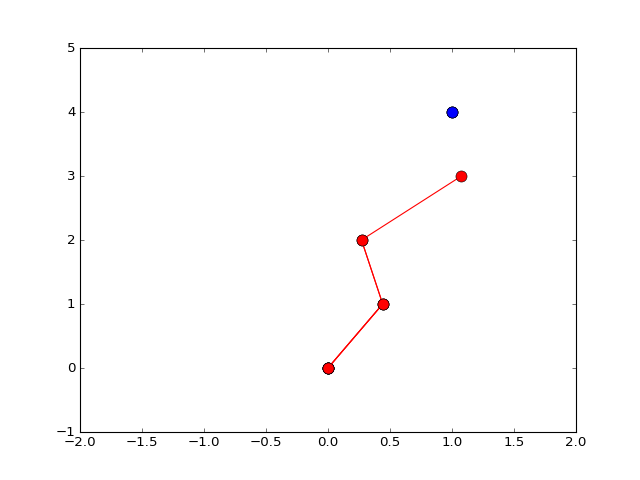

[0.0, 0.4411431197130108]
[0, 1]
[0.0, 0.4411431197130108, 0.2702229824128156]
[0, 1, 2]
[0.0, 0.4411431197130108, 0.2702229824128156, 1.0764995482034814]
[0, 1, 2, 3]


In [37]:
beta = 1.0
N = 4
dtau = beta / N
nsteps = 1                      # number of paths to be generated
xstart, xend = 0.0, 1.0          # initial and final points
for step in range(nsteps):
    x = [xstart]
    Y = [0];
    plt.figure()
    for k in range(1, N):        # loop over internal slices
        dtau_prime = (N - k) * dtau
        x_mean = (dtau_prime * x[k - 1] + dtau * xend) / \
                 (dtau + dtau_prime)
        sigma = math.sqrt(1.0 / (1.0 / dtau + 1.0 / dtau_prime))
        xnew=np.random.normal(x_mean, sigma)
        x.append(xnew)
        Y.append(k)
        print x
        print Y
        plt.plot(xstart,0, 'bo',markersize=10)
        plt.plot(x,Y,'ro-',markersize=10)
        
        plt.plot(xend,N, 'bo',markersize=10)
        plt.xlim(-2,2)
        plt.ylim(-1, N+1)
    x.append(xend)
    #print x





# Referencias

1. Statistical Mechanics: Algorithms and Computations, W. Krauth, Oxford University Press, 2006
2. Quantum Monte Carlo Approaches for Correlated Systems, Federico Becca, Sandro Sorella, Cambridge University Press, 2017
3. Monte Carlo Methods, Malvin H. Kalos, Paula A. Whitlock, John Wiley & Sons, 2009

